In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
%matplotlib inline

In [19]:
data = pd.read_csv("players.csv")
data.sample(5)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
3888,3889,Jamie Paterson,"CAM, CM, LM",12/20/1991,175,68,71,71,CAM,71,...,1,High/ Medium,Lean (170-185),72,66,67,63,72,NaN,['Technical Dribbler (AI)']
1412,1413,Joakim Mæhle Pedersen,RB,5/20/1997,184,79,76,81,RWB,77,...,1,High/ High,Normal (170-185),71,63,25,68,73,"['Speedster', 'Engine']",['Speed Dribbler (AI)']
347,348,Kevin Kampl,"CM, CDM, CAM",10/9/1990,178,66,81,81,CM,81,...,2,High/ High,Lean (170-185),85,80,75,78,84,"['Engine', 'Acrobat']","['Flair', 'Technical Dribbler (AI)']"
8435,8436,長泽 和明,"CF, RM, CM",12/16/1991,172,68,67,67,CF,67,...,1,Medium/ Medium,Normal (170-185),67,64,59,64,69,NaN,NaN
16285,16286,Glen McAuley,"ST, LM, RM",2/24/2000,190,74,58,73,ST,60,...,1,Medium/ Medium,Lean (185+),57,48,34,41,55,NaN,['Technical Dribbler (AI)']


In [20]:
data.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

In [21]:
data.columns[(data.isnull().any())]

Index(['int_team_id', 'str_player_speciality', 'str_trait'], dtype='object')

In [22]:
# Renaming the Columns in Dataset in a suitable Pythonic way
data = data.rename(columns = {'str_player_name': 'PlayerName', 'str_positions': 'Positions',
                                       'dt_date_of_birth': 'D.O.B', 'int_height': 'PlayerHeight',
                                       'int_weight': 'PlayerWeight', 'int_overall_rating': 'OverallRating',
                                       'int_potential_rating': 'PotentialRating', 'str_best_position': 'BestPositions',
                                       'int_best_overall_rating': 'BestOverallRating', 'int_value': 'PlayerValue',
                                       'int_wage': 'Wage', 'str_nationality': 'Nationality',
                                       'int_crossing': 'Crossing', 'int_finishing': 'FinishingAccuracy',
                                       'int_heading_accuracy': 'HeadingAccuracy', 'int_short_passing': 'ShortPassing',
                                       'int_volleys': 'Volleys', 'int_defensive_awareness': 'DefensiveAwareness',
                                       'int_standing_tackle': 'StandingTackle', 'int_sliding_tackle': 'SlidingTackle',
                                       'int_diving': 'Diving', 'int_handling': 'Handling',
                                       'int_kicking': 'Kicking', 'int_gk_positioning': 'GkPositioning',
                                       'int_reflexes': 'Reflexes', 'int_aggression': 'Aggression',
                                       'int_interceptions': 'Interceptions', 'int_positioning': 'Positioning',
                                       'int_vision': 'Vision', 'int_penalties': 'Penalties',
                                       'int_composure': 'Composure', 'int_acceleration': 'Acceleration',
                                       'int_sprint_speed': 'SprintSpeed', 'int_agility': 'Agility',
                                       'int_reactions': 'Reactions', 'int_balance': 'Balance',
                                       'int_shot_power': 'ShotPower', 'int_jumping': 'JumpingPower',
                                       'int_stamina': 'Stamina', 'int_strength': 'Strength',
                                       'int_long_shots': 'LongShots', 'str_preferred_foot': 'PreferredFoot',
                                        'int_weak_foot': 'WeakFoot', 'int_skill_moves': 'SkillMoves',
                                       'int_international_reputations': 'InternationalReputations', 'str_work_rate': 'WorkRate',
                                       'str_body_type': 'BodyType', 'int_dribbling': 'Dribbling',
                                       'int_curve': 'Curve', 'int_fk_accuracy': 'FreekickAccuracy',
                                       'int_long_passing': 'LongPassing', 'int_ball_control': 'BallControl'}, inplace = False)

In [23]:
#Converting our DateTime column to Numerical Column 
data['D.O.B'] = pd.to_datetime(data['D.O.B'])
data['year'] = data['D.O.B'].dt.year
data['month'] = data['D.O.B'].dt.month

In [24]:
#Subtract 2021 from D.O.B to get age
data['age'] = 2021 - data['year']

In [29]:
#Dropping columns
columns = ['int_team_id', 'str_player_speciality', 'str_trait','int_player_id','D.O.B','year','Positions','OverallRating']

data = data.drop(columns,axis=1,inplace=False)
data.sample(5).T

,14493,11975,18785,15984,9382
PlayerName,Kendall Isaiah McIntosh,Aiyegun Tosin,Ged Garner,Mamadou Diatta,Josh Morris
PlayerHeight,183,179,174,188,182
PlayerWeight,79,77,68,80,72
PotentialRating,63,76,58,71,66
BestPositions,GK,ST,ST,CB,LW
BestOverallRating,61,65,52,61,66
PlayerValue,300000,1400000,110000,500000,850000
Wage,1000,3000,1000,500,4000
Nationality,United States,Nigeria,England,Senegal,England
Crossing,21,59,32,47,68


In [30]:
data.BodyType.value_counts()

Normal (170-185)    6535
Lean (170-185)      4116
Normal (185+)       4056
Lean (185+)         1933
Normal (170-)        681
Stocky (170-185)     626
Lean (170-)          462
Stocky (185+)        373
Unique               119
Stocky (170-)        101
Name: BodyType, dtype: int64

In [31]:
data.shape

(19002, 51)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlayerName                19002 non-null  object
 1   PlayerHeight              19002 non-null  int64 
 2   PlayerWeight              19002 non-null  int64 
 3   PotentialRating           19002 non-null  int64 
 4   BestPositions             19002 non-null  object
 5   BestOverallRating         19002 non-null  int64 
 6   PlayerValue               19002 non-null  int64 
 7   Wage                      19002 non-null  int64 
 8   Nationality               19002 non-null  object
 9   Crossing                  19002 non-null  int64 
 10  FinishingAccuracy         19002 non-null  int64 
 11  HeadingAccuracy           19002 non-null  int64 
 12  ShortPassing              19002 non-null  int64 
 13  Volleys                   19002 non-null  int64 
 14  DefensiveAwareness    

In [33]:
data.describe()

,PlayerHeight,PlayerWeight,PotentialRating,BestOverallRating,PlayerValue,Wage,Crossing,FinishingAccuracy,HeadingAccuracy,ShortPassing,...,WeakFoot,SkillMoves,InternationalReputations,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,month,age
count,19002.000000,19002.000000,19002.000000,19002.000000,1.900200e+04,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,...,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000,19002.000000
mean,181.225660,75.046311,71.148932,66.784286,2.891449e+06,9113.167035,49.690454,45.877329,51.970056,58.808494,...,2.942217,2.365540,1.090569,55.607462,47.271603,42.394432,52.779971,58.552416,5.836123,26.592464
std,6.847472,7.078378,6.115352,6.733926,7.733189e+06,19735.324238,18.141514,19.580879,17.323647,14.517060,...,0.669568,0.766687,0.359019,18.786894,18.217325,17.240399,15.172601,16.580120,3.446935,4.715048
min,155.000000,50.000000,48.000000,48.000000,0.000000e+00,0.000000,6.000000,3.000000,5.000000,7.000000,...,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,1.000000,18.000000
25%,176.000000,70.000000,67.000000,62.000000,4.750000e+05,1000.000000,38.000000,30.000000,44.000000,54.000000,...,3.000000,2.000000,1.000000,49.000000,35.000000,31.000000,43.000000,54.000000,3.000000,23.000000
50%,181.000000,75.000000,71.000000,67.000000,9.500000e+05,3000.000000,54.000000,50.000000,55.000000,62.000000,...,3.000000,2.000000,1.000000,61.000000,49.000000,41.000000,56.000000,63.000000,5.000000,26.000000
75%,186.000000,80.000000,75.000000,71.000000,2.000000e+06,8000.000000,63.000000,62.000000,64.000000,68.000000,...,3.000000,3.000000,1.000000,68.000000,61.000000,55.000000,64.000000,69.000000,9.000000,30.000000
max,206.000000,110.000000,95.000000,93.000000,1.855000e+08,560000.000000,94.000000,95.000000,93.000000,94.000000,...,5.000000,5.000000,5.000000,96.000000,94.000000,94.000000,93.000000,96.000000,12.000000,54.000000


In [35]:
# Checking the number of unique features in each column
data.nunique()

PlayerName                  18914
PlayerHeight                   50
PlayerWeight                   56
PotentialRating                46
BestPositions                  15
BestOverallRating              46
PlayerValue                   256
Wage                          133
Nationality                   165
Crossing                       89
FinishingAccuracy              93
HeadingAccuracy                89
ShortPassing                   86
Volleys                        88
DefensiveAwareness             92
StandingTackle                 87
SlidingTackle                  85
Diving                         69
Handling                       70
Kicking                        79
GkPositioning                  75
Reflexes                       70
Aggression                     88
Interceptions                  89
Positioning                    94
Vision                         86
Penalties                      87
Composure                      85
Acceleration                   85
SprintSpeed   

In [37]:
# Fastest Players
player_accleration = data[['Acceleration','PlayerName','BestPositions','age','Nationality','SprintSpeed']].nlargest(7,['Acceleration']).set_index('PlayerName')
player_accleration

,Acceleration,BestPositions,age,Nationality,SprintSpeed
PlayerName,,,,,
Adama Traoré Diarra,97,RM,25,Spain,96
Kylian Mbappé Lottin,96,ST,23,France,96
Raheem Shaquille Sterling,96,LW,27,England,90
Moussa Diaby,96,LM,22,France,90
Alphonso Davies,96,LB,21,Canada,96
Daniel James,96,RM,24,Wales,95
Jérémy Doku,96,RW,19,Belgium,91


In [38]:
#Tallest Players
player_height = data[["PlayerHeight","PlayerName","PlayerWeight","BestPositions",'age','Nationality']].nlargest(10, ['PlayerHeight']).set_index('PlayerName')
player_height

,PlayerHeight,PlayerWeight,BestPositions,age,Nationality
PlayerName,,,,,
Tomáš Holý,206,102,GK,30,Czech Republic
Costel Fane Pantilimon,203,96,GK,34,Romania
Abdoul Bocar Bâ,203,94,CB,27,Mauritania
Aaron James Chapman,203,92,GK,31,England
Vanja Milinković-Savić,202,92,GK,24,Serbia
Kjell Scherpen,202,85,GK,21,Netherlands
Stefan Maierhofer,202,98,ST,39,Austria
Demba Thiam Ngagne,202,87,GK,23,Senegal
Lovre Kalinić,201,99,GK,31,Croatia


In [39]:
#Best Defenders
player_defence = data[["DefensiveAwareness","PlayerName","BestPositions",'age','Nationality']].nlargest(10, ['DefensiveAwareness']).set_index('PlayerName')
player_defence

,DefensiveAwareness,BestPositions,age,Nationality
PlayerName,,,,
Giorgio Chiellini,94,CB,37,Italy
Virgil van Dijk,93,CB,30,Netherlands
Milan Škriniar,92,CB,26,Slovakia
Kalidou Koulibaly,91,CB,30,Senegal
Mats Hummels,90,CB,33,Germany
Clément Nicolas Laurent Lenglet,90,CB,26,France
Leonardo Bonucci,90,CB,34,Italy
Diego Roberto Godín Leal,90,CB,35,Uruguay
N'Golo Kanté,89,CDM,30,France


In [40]:
#Strongest Players
player_strength = data[["Strength","PlayerName","PlayerHeight","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(7, ['Strength']).set_index('PlayerName')
player_strength

,Strength,PlayerHeight,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Adebayo Akinfenwa,97,178,65,39,England,110,ST
Daryl Dike,96,188,59,21,United States,100,ST
Romelu Lukaku Menama,95,191,73,28,Belgium,94,ST
Armando Jesús Méndez Alcorta,95,176,79,25,Uruguay,82,RB
Aleksandar Vukotić,95,201,61,26,Serbia,95,CB
Joyskim Aurélien Dawa Tchakonte,95,194,66,25,Cameroon,95,CB
Kalidou Koulibaly,94,187,70,30,Senegal,89,CB


In [42]:
#Best Players with LongPasses
player_long_passes = data[["LongPassing","PlayerName","ShortPassing","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(10, ['LongPassing']).set_index('PlayerName')
player_long_passes

,LongPassing,ShortPassing,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Kevin De Bruyne,93,94,89,30,Belgium,70,CAM
Toni Kroos,93,93,75,31,Germany,76,CM
Lionel Andrés Messi Cuccittini,91,91,72,34,Argentina,72,RW
Paul Pogba,91,86,83,28,France,84,CM
Daniel Parejo Muñoz,90,92,78,32,Spain,74,CM
Trent Alexander-Arnold,89,85,88,23,England,69,RB
Luka Modrić,89,91,83,36,Croatia,66,CM
Marco Verratti,89,90,76,29,Italy,60,CM
Hakim Ziyech,89,86,80,28,Morocco,65,CAM


In [43]:
#Best Players with ShortPasses
player_short_passes = data[["ShortPassing","PlayerName","LongPassing","Stamina",'age','Nationality','PlayerWeight','BestPositions']].nlargest(10, ['ShortPassing']).set_index('PlayerName')
player_short_passes

,ShortPassing,LongPassing,Stamina,age,Nationality,PlayerWeight,BestPositions
PlayerName,,,,,,,
Kevin De Bruyne,94,93,89,30,Belgium,70,CAM
Toni Kroos,93,93,75,31,Germany,76,CM
David Josué Jiménez Silva,92,84,70,35,Spain,67,CAM
Daniel Parejo Muñoz,92,90,78,32,Spain,74,CM
Lionel Andrés Messi Cuccittini,91,91,72,34,Argentina,72,RW
Luka Modrić,91,89,83,36,Croatia,66,CM
Marco Verratti,90,89,76,29,Italy,60,CM
Frenkie de Jong,90,86,90,24,Netherlands,74,CM
Luis Alberto Romero Alconchel,90,89,75,29,Spain,74,CAM


In [44]:
#Most Paid Players
player_wages = data[["Wage","PlayerName","PlayerValue","BestOverallRating",'age','Nationality','PotentialRating','InternationalReputations']].nlargest(10, ['Wage']).set_index('PlayerName')
player_wages

,Wage,PlayerValue,BestOverallRating,age,Nationality,PotentialRating,InternationalReputations
PlayerName,,,,,,,
Lionel Andrés Messi Cuccittini,560000,103500000,93,34,Argentina,93,5
Kevin De Bruyne,370000,129000000,91,30,Belgium,91,4
Karim Benzema,350000,83500000,89,34,France,89,4
Eden Hazard,350000,89500000,88,30,Belgium,88,4
Carlos Henrique Venancio Casimiro,310000,90500000,89,29,Brazil,89,3
Toni Kroos,310000,87500000,88,31,Germany,88,4
Sergio Ramos García,300000,33500000,89,35,Spain,89,4
Sergio Leonel Agüero del Castillo,300000,83500000,89,33,Argentina,89,4
Antoine Griezmann,290000,79500000,87,30,France,87,4


In [45]:
#Best Goalkeepers by Reflex
player_Goalie = data[["Reflexes","PlayerName",'age','Nationality','Kicking','Handling']].nlargest(10, ['Reflexes']).set_index('PlayerName')
player_Goalie

,Reflexes,age,Nationality,Kicking,Handling
PlayerName,,,,,
Jan Oblak,90,28,Slovenia,78,92
Marc-André ter Stegen,90,29,Germany,88,85
Keylor Navas Gamboa,90,35,Costa Rica,75,81
Hugo Lloris,90,35,France,68,82
Alisson Ramsés Becker,89,29,Brazil,85,88
Manuel Neuer,89,35,Germany,91,87
Samir Handanovič,89,37,Slovenia,73,85
David De Gea Quintana,89,31,Spain,78,81
Gianluigi Donnarumma,89,22,Italy,76,81


# Correlation

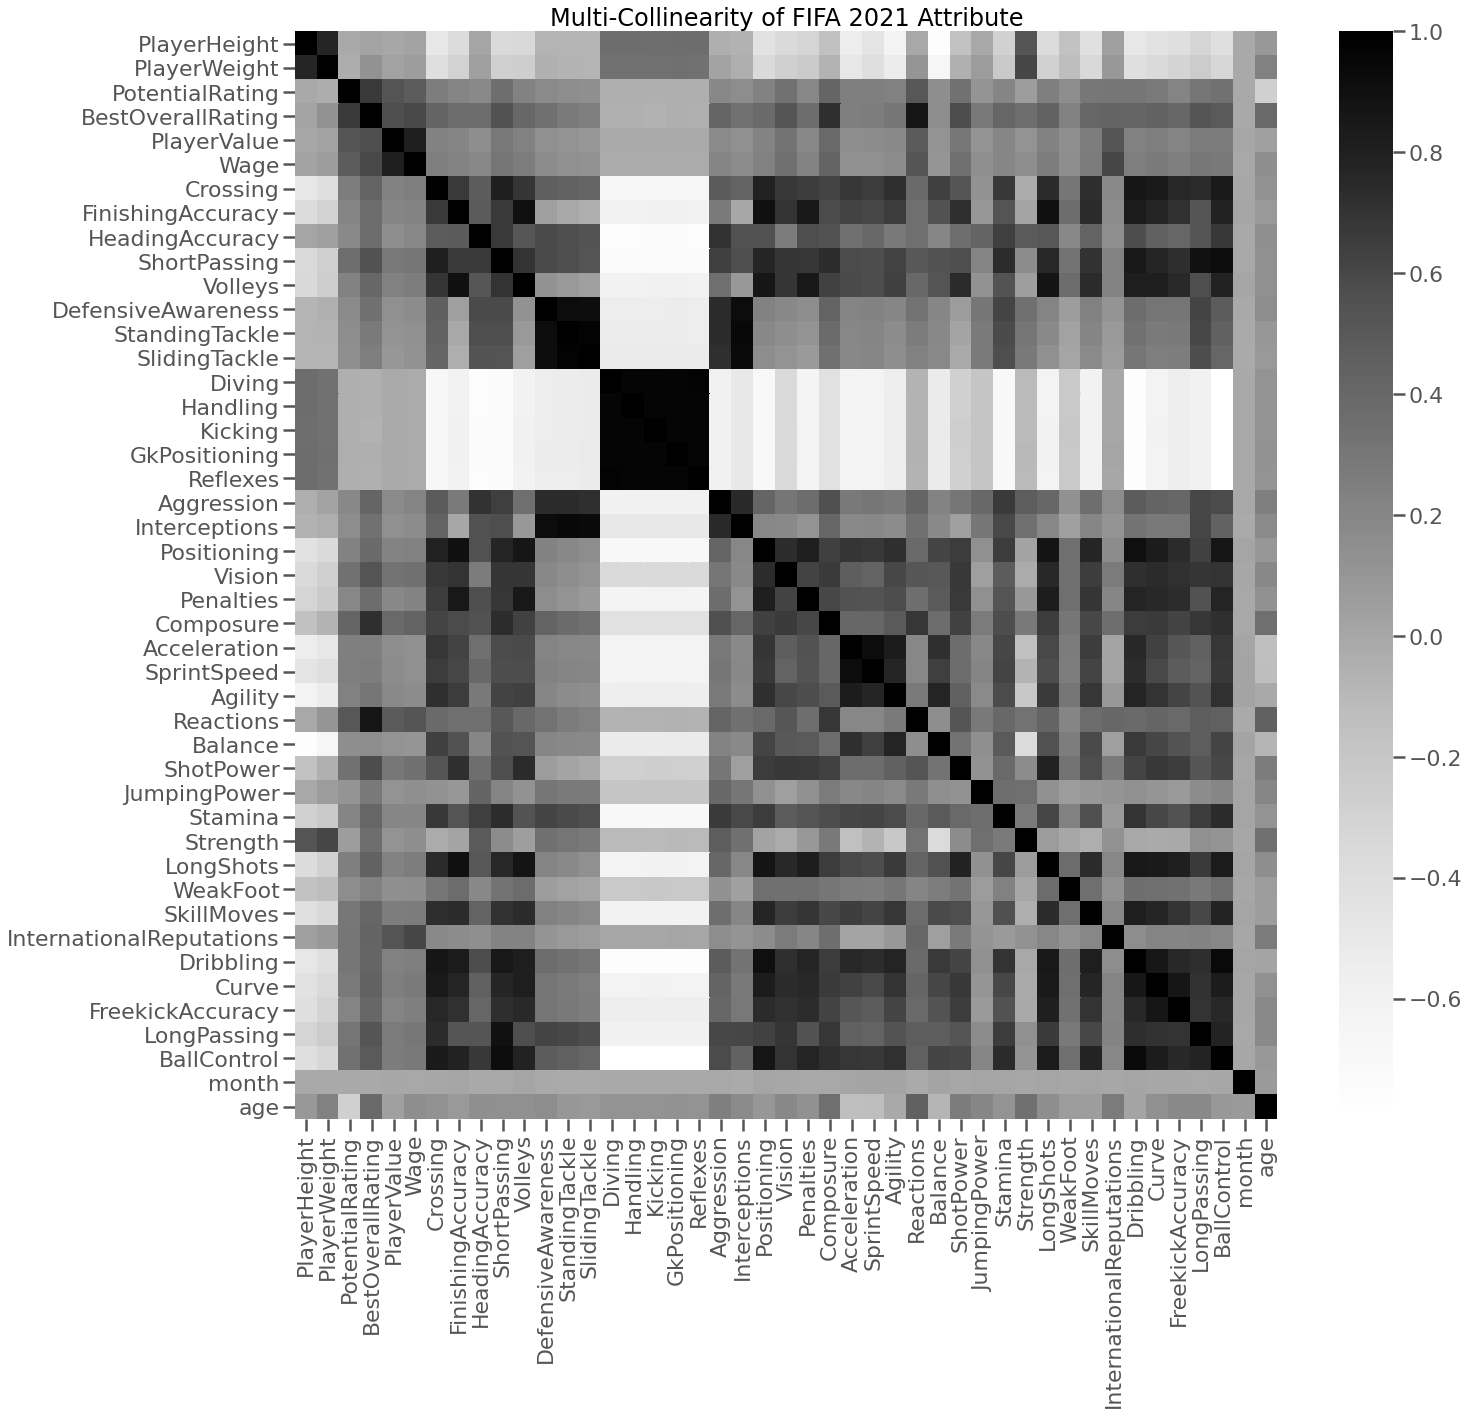

In [47]:
fig,ax = plt.subplots(figsize=(22,20))
sns.set_context('poster')
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='Greys')
ax.set_title("Multi-Collinearity of FIFA 2021 Attribute")
plt.savefig('heatmap.png')

# Pair Plot

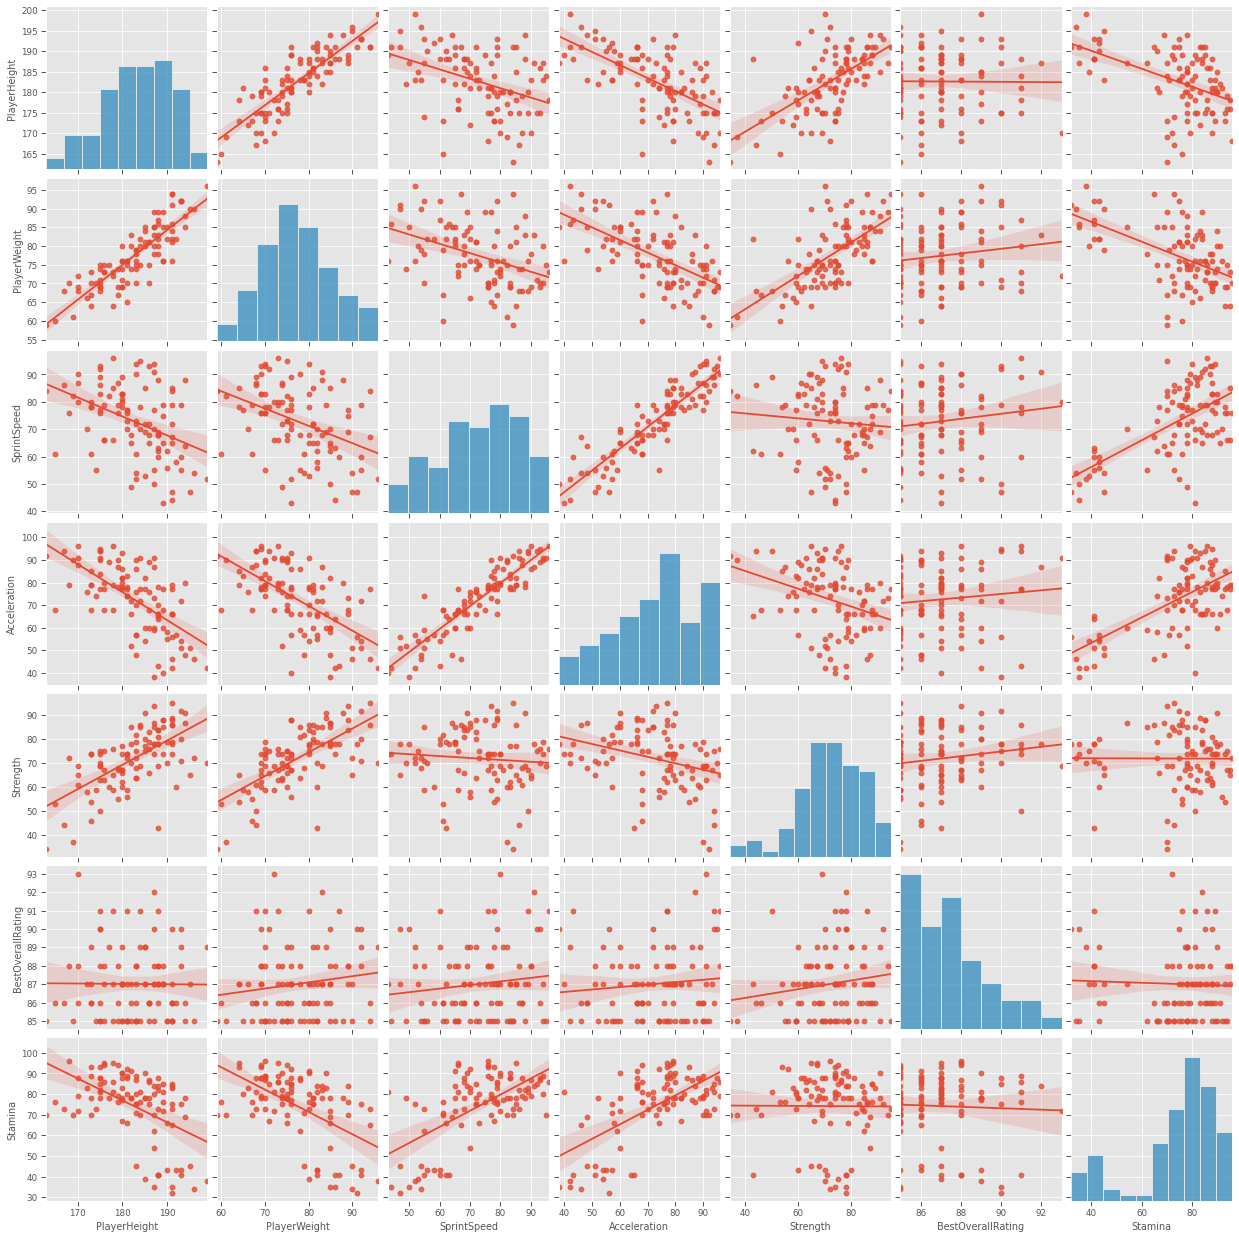

In [48]:
sns.set_context('paper')
data_lm = data.head(100)
sns.pairplot(data_lm, vars=['PlayerHeight','PlayerWeight','SprintSpeed','Acceleration','Strength','BestOverallRating','Stamina'],kind='reg')
plt.savefig('pairplot.png')

# WordCloud of Nationality

(-0.5, 1999.5, 1599.5, -0.5)

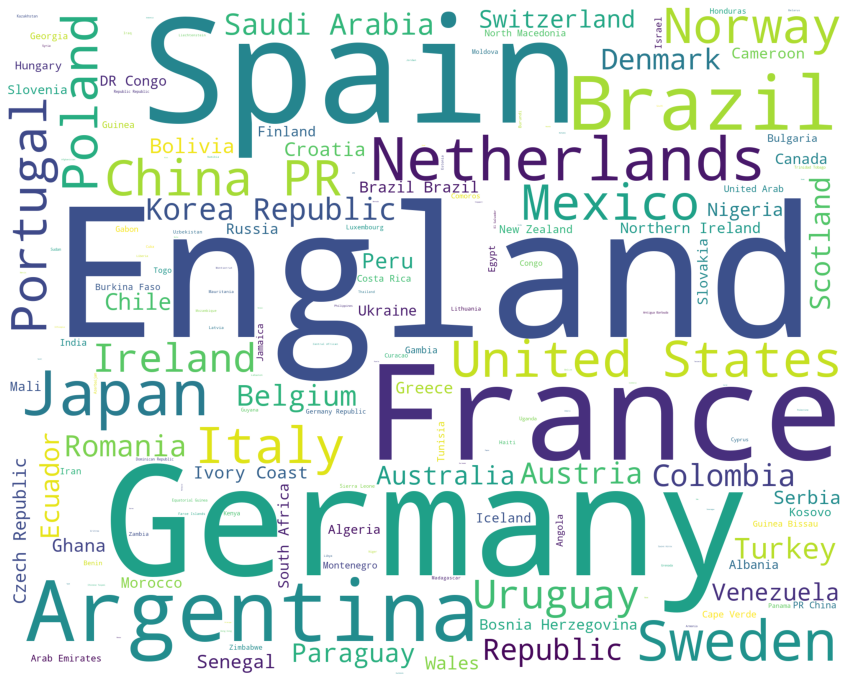

In [50]:
d_frame = data.Nationality

plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
    background_color='white',
    width=2000, 
    height=1600, 
).generate(" ".join(d_frame))
plt.imshow(wordcloud)
plt.axis('off')

In [52]:
data.groupby("Nationality").PlayerName.count().sort_values(ascending=False).head(10)

Nationality
England          1705
Germany          1199
Spain            1063
France           1002
Argentina         932
Brazil            894
Japan             483
Netherlands       446
Sweden            381
United States     381
Name: PlayerName, dtype: int64

# Who are the Top Players in FIFA 2021 ?

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


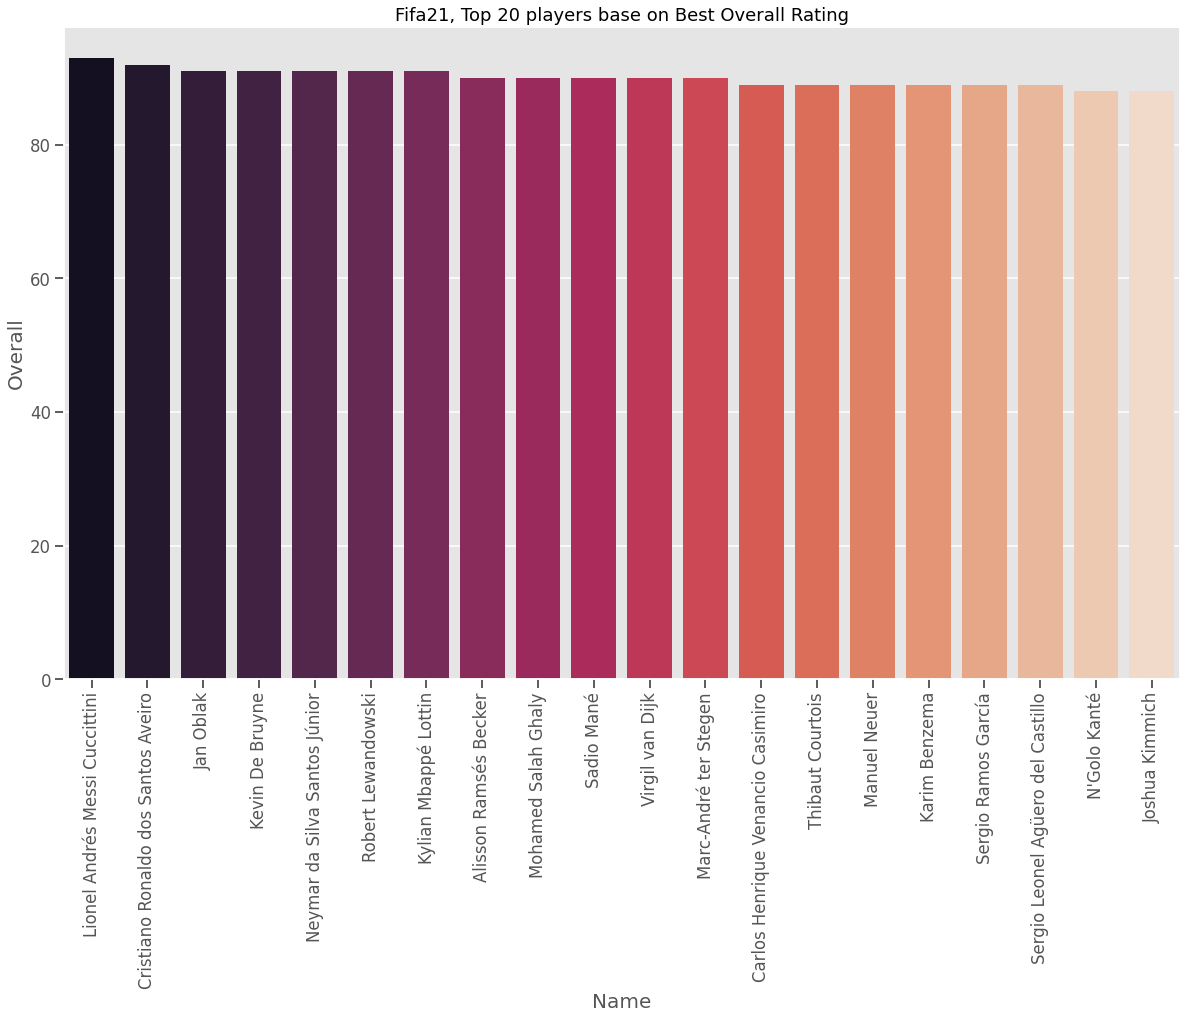

In [60]:
# we get the names and overall from the data
overall = data.BestOverallRating
footballer_name = data.PlayerName

# We create a Dataframe 
new_data = pd.DataFrame({'PlayerName':footballer_name,'BestOverallRating':overall})

x = new_data.PlayerName.head(20)
y = new_data.BestOverallRating.head(20)

sns.set_context('talk')
plt.figure(figsize=(20,12))

ax = sns.barplot(x,y,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel("Name",size=20)
plt.ylabel("Overall",size=20)
plt.title('Fifa21, Top 20 players base on Best Overall Rating')
plt.show()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))

## MESSI IS THE G.O.A.T 

# Which foot does the footballers in FIFA 21 use more?

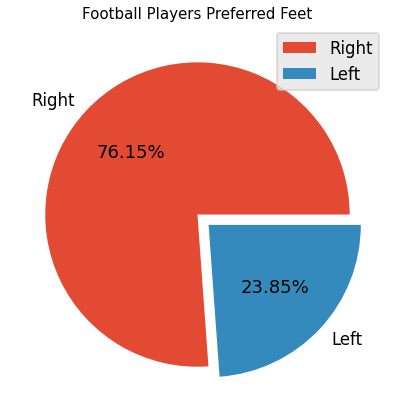

<Figure size 432x288 with 0 Axes>

In [62]:
# Which foot does the footballers in fifa 21 use more?
preferred_foot_labels = data["PreferredFoot"].value_counts().index # (Right,Left) 
preferred_foot_values = data["PreferredFoot"].value_counts().values # (Right Values, Left Values)
explode = (0, 0.1) # used to separate a slice of cake

plt.figure(figsize = (7,7))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=explode, autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',fontsize = 15)
plt.legend()
plt.show()
# plt.savefig('Piechart.jpg')

# Fifa 21 Player's Age Distribution

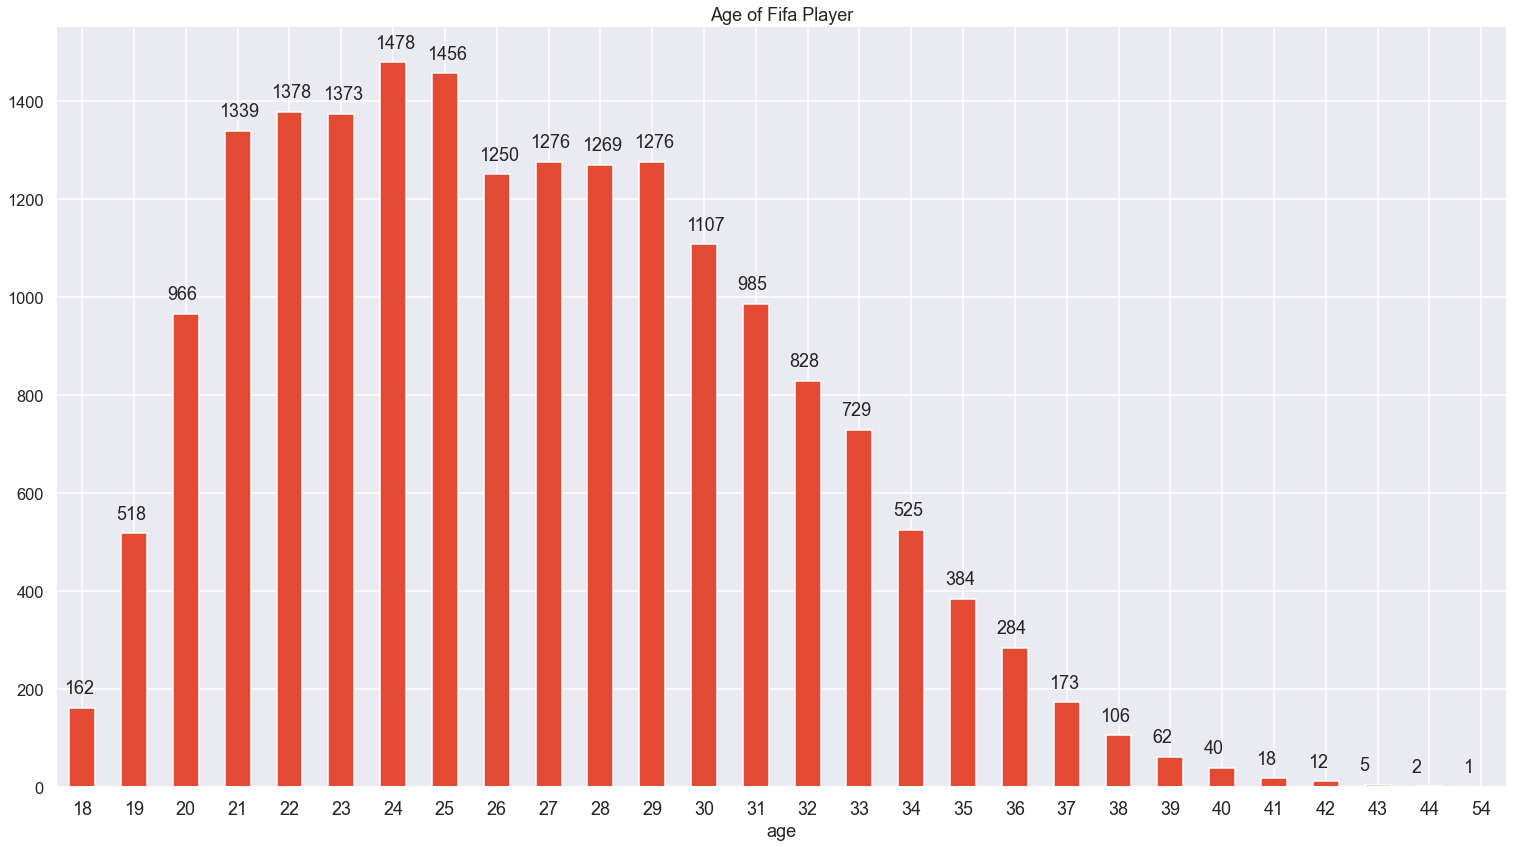

In [66]:

sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(26,14))
ax = data.groupby('age')['PlayerName'].count().plot.bar()
plt.title('Age of Fifa Player')
plt.xticks(fontsize = 18,rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.1, p.get_height()+30))
# plt.savefig('ageplot.png')

# Top 10 countries with the most Footballers

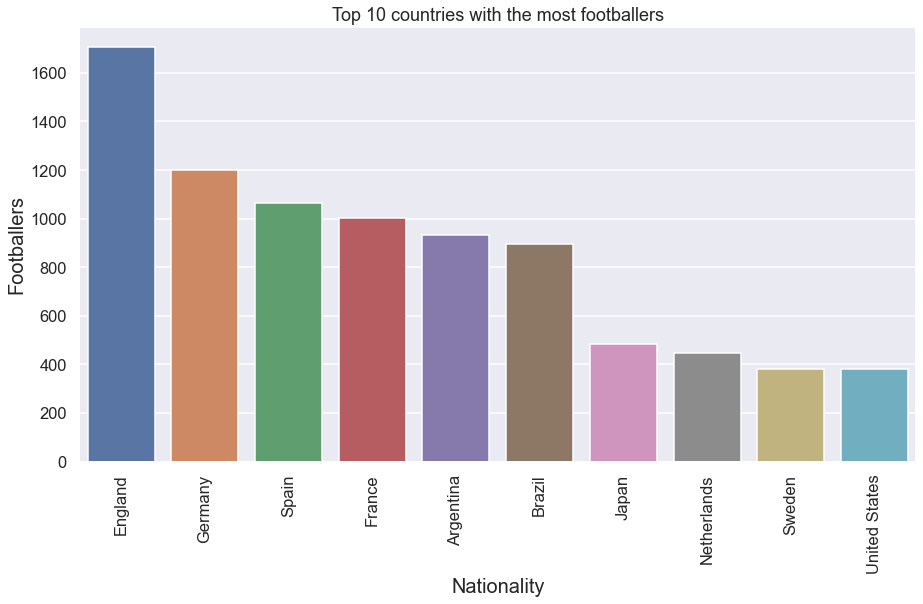

In [70]:
# Counter is a counter tool.Which country has how many players
newData = Counter(data["Nationality"])
# top 10 countries with most
most_countries = newData.most_common(10)
sns.set_context('talk')

x,y = zip(*most_countries)
x,y = list(x),list(y)

plt.figure(figsize=(15,8))
plt.xticks(rotation= 90)
ax= sns.barplot(x=x, y=y, palette='deep') # x = Nationality, y = Footballers
plt.xlabel('Nationality', size = 20) 
plt.ylabel('Footballers', size = 20 ) 
plt.title('Top 10 countries with the most footballers') 
plt.show()
# plt.savefig('TopCountries.png')